In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [4]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.5, random_state=2)

In [6]:
ns_probs = [0 for _ in range(len(testY))]

In [7]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainY)

LogisticRegression()

In [9]:
# predicciones de posibilidades
lr_probs = model.predict_proba(testX)
# nos quedamos con las probabildades de la clase positiva (la probabilidad es de 1)
lr_probs = lr_probs[:, 1]

In [13]:
ns_fpr, ns_tpr, _ = roc_curve(testY, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_probs)

In [16]:
print('Sin entrenar: ROC AUC= %.3F' % (ns_auc))
print('Regresión Logística: ROC AUC= %.3f' % (lr_auc))

Sin entrenar: ROC AUC= 0.500
Regresión Logística: ROC AUC= 0.903


In [15]:
ns_auc = roc_auc_score(testY, ns_probs)
lr_auc = roc_auc_score(testY, lr_probs)

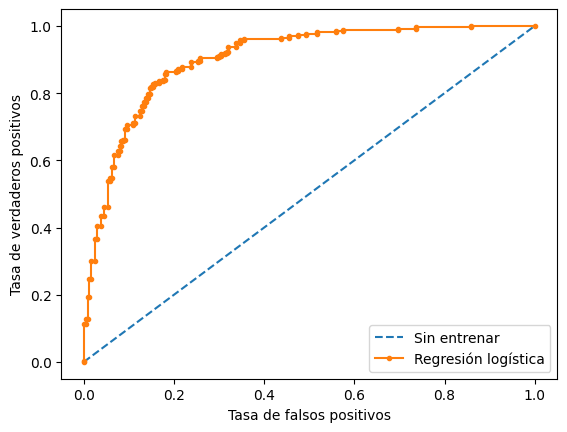

In [21]:
# graficamos la curva de roc
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión logística')

# etiquetas de los ejes
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')
pyplot.legend()
pyplot.show()